## Import Library and Data

In [53]:
#Import Library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re 
from nltk.tokenize import word_tokenize     
import nltk 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import Sastrawi
import string

In [25]:
#Read dataset
df = pd.read_csv("dataset_penyisihan_bdc_2024.csv", sep = ";")
df.head(10)

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
5,RT Duh jangan sampai Pak lurah denger nih Ã°ÂŸ...,Politik
6,Prabowo minta Kemenhan dan Tim Satgas Air Unha...,Pertahanan dan Keamanan
7,RT Anies: Ya Allah Sibukkanlah Orang Zalim Aga...,Politik
8,RT Abah @znOMP7ZMVU9dMuMNA/cIazC9q5+hgwVkTsQNd...,Politik
9,"RT Bawaslu dimaki ""JANCUK"" sama warga garaÃ‚Â²...",Politik


<Axes: xlabel='label'>

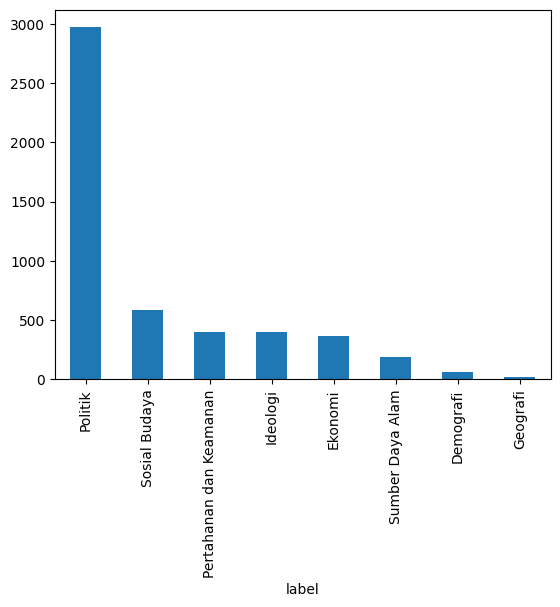

In [26]:
df["label"].value_counts().plot.bar()

## Text Preprocessing

In [42]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
#Lower case 
df["text"] = df["text"].str.lower()

#Remove Angka
def remove_num(teks):
    return re.sub(r"\d+", "", teks)

df["text"] = df["text"].apply(remove_num)

In [32]:
#Remove RT (retweet) or [Retweet]
def remove_retweet(teks):
    return re.sub(r'\brt\b|\[[^\]]+\]', '', teks)

df["text"] = df["text"].apply(remove_retweet)

df

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rek...,Politik
2,@ciqxqwgattmtxocatxjovqvv/yheyaiogmfgy= emng b...,Demografi
3,@lrxfbwwgbxrpsj/hhztbqvgxqtfwrgzmhkq= sewaktu...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,@ldsggexobttdhwqltxjveytenauzizsywso= ngeliat...,Politik
4996,masyarakat yakin bahwa prabowo-gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@ciigsdjaprmaqyegwnlpizsdyqnzmhjjzgosxfrm= loo...,Pertahanan dan Keamanan


In [ ]:
#Hapus yang ada @base64 gitu
def hapus_at_base64(teks):
    return re.sub(r'@[\w+/]+={0,2}', '', teks).strip()

# Terapkan fungsi ke kolom 'text'
df['text'] = df['text'].apply(hapus_at_base64)

df


,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik
2,"emng bener sih, pendukung ada yg goblok, begi...",Demografi
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,"ngeliat debat kemaren pas prabowo kicep, kekir...",Politik
4996,masyarakat yakin bahwa prabowo-gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,"look at that pak ganjar, anda sdh berkecimpung...",Pertahanan dan Keamanan


In [35]:
#Hapus Url 
regex_url = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

def hapus_url(teks):
    return re.sub(regex_url, '', teks).strip()

df["text"] = df["text"].apply(hapus_url)

df

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik
2,"emng bener sih, pendukung ada yg goblok, begi...",Demografi
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,"ngeliat debat kemaren pas prabowo kicep, kekir...",Politik
4996,masyarakat yakin bahwa prabowo-gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,"look at that pak ganjar, anda sdh berkecimpung...",Pertahanan dan Keamanan


In [36]:
#Remove Punctuation 
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik
2,emng bener sih pendukung ada yg goblok begitu...,Demografi
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik
4996,masyarakat yakin bahwa prabowogibran memiliki ...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,look at that pak ganjar anda sdh berkecimpung ...,Pertahanan dan Keamanan


In [46]:
def tokenisasi_dan_frekuensi(teks):
    tokens = word_tokenize(teks)
    freq_tokens = FreqDist(tokens)
    return tokens, freq_tokens.most_common()

# Terapkan tokenisasi dan frekuensi pada kolom 'cleaned_text'
df['tokens'] = df['text'].apply(lambda x: tokenisasi_dan_frekuensi(x)[0])
df['freq_tokens'] = df['text'].apply(lambda x: tokenisasi_dan_frekuensi(x)[1])

df

,text,label,tokens,freq_tokens
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"[kunjungan, prabowo, ini, untuk, meresmikan, d...","[(prabowo, 2), (kunjungan, 1), (ini, 1), (untu..."
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[(mata, 2), (anies, 1), (dapat, 1), (tepuk, 1)..."
2,emng bener sih pendukung ada yg goblok begitu...,Demografi,"[emng, bener, sih, pendukung, ada, yg, goblok,...","[(pendukung, 2), (ada, 2), (yg, 2), (jg, 2), (..."
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[(kritis, 3), (dianggap, 3), (dan, 2), (sewakt..."
4,anies baswedan harap asn termasuk tni dan polr...,Politik,"[anies, baswedan, harap, asn, termasuk, tni, d...","[(anies, 1), (baswedan, 1), (harap, 1), (asn, ..."
...,...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[(ngeliat, 1), (debat, 1), (kemaren, 1), (pas,..."
4996,masyarakat yakin bahwa prabowogibran memiliki ...,Politik,"[masyarakat, yakin, bahwa, prabowogibran, memi...","[(masyarakat, 1), (yakin, 1), (bahwa, 1), (pra..."
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,"[imo, both, are, irrational, but, yg, satu, ja...","[(irrational, 2), (but, 2), (dan, 2), (imo, 1)..."
4998,look at that pak ganjar anda sdh berkecimpung ...,Pertahanan dan Keamanan,"[look, at, that, pak, ganjar, anda, sdh, berke...","[(pak, 2), (ganjar, 2), (look, 1), (at, 1), (t..."


In [51]:
#Stopword 
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens, stopwords):
    return [word for word in tokens if word not in stopwords] 

df['token_udah_stopword'] = df['tokens'].apply(lambda x: remove_stopwords(x, list_stopwords))

df['token_udah_stopword']


0       [kunjungan, prabowo, meresmikan, menyerahkan, ...
1       [anies, tepuk, tangan, meriah, rektor, mewajib...
2       [emng, bener, sih, pendukung, yg, goblok, jg, ...
3       [anies, bersikap, kritis, kinerja, prabowo, di...
4       [anies, baswedan, harap, asn, tni, polri, pega...
                              ...                        
4995    [ngeliat, debat, kemaren, pas, prabowo, kicep,...
4996    [masyarakat, prabowogibran, memiliki, visi, se...
4997    [imo, both, are, irrational, but, yg, irration...
4998    [look, at, that, ganjar, sdh, berkecimpung, lg...
4999    [acara, memasak, calon, presiden, nomor, urut,...
Name: token_udah_stopword, Length: 5000, dtype: object

In [57]:
# Membuat objek stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming
def stem_uhuy(tokens):
    return [stemmer.stem(token) for token in tokens]

df["akhir"] = df["token_udah_stopword"].apply(stem_uhuy)

df

,text,label,tokens,freq_tokens,token_udah_stopword,akhir
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"[kunjungan, prabowo, ini, untuk, meresmikan, d...","[(prabowo, 2), (kunjungan, 1), (ini, 1), (untu...","[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu..."
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[(mata, 2), (anies, 1), (dapat, 1), (tepuk, 1)...","[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma..."
2,emng bener sih pendukung ada yg goblok begitu...,Demografi,"[emng, bener, sih, pendukung, ada, yg, goblok,...","[(pendukung, 2), (ada, 2), (yg, 2), (jg, 2), (...","[emng, bener, sih, pendukung, yg, goblok, jg, ...","[emng, bener, sih, dukung, yg, goblok, jg, dg,..."
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[(kritis, 3), (dianggap, 3), (dan, 2), (sewakt...","[anies, bersikap, kritis, kinerja, prabowo, di...","[anies, sikap, kritis, kerja, prabowo, anggap,..."
4,anies baswedan harap asn termasuk tni dan polr...,Politik,"[anies, baswedan, harap, asn, termasuk, tni, d...","[(anies, 1), (baswedan, 1), (harap, 1), (asn, ...","[anies, baswedan, harap, asn, tni, polri, pega...","[anies, baswedan, harap, asn, tni, polri, pega..."
...,...,...,...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[(ngeliat, 1), (debat, 1), (kemaren, 1), (pas,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,masyarakat yakin bahwa prabowogibran memiliki ...,Politik,"[masyarakat, yakin, bahwa, prabowogibran, memi...","[(masyarakat, 1), (yakin, 1), (bahwa, 1), (pra...","[masyarakat, prabowogibran, memiliki, visi, se...","[masyarakat, prabowogibran, milik, visi, jalan..."
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,"[imo, both, are, irrational, but, yg, satu, ja...","[(irrational, 2), (but, 2), (dan, 2), (imo, 1)...","[imo, both, are, irrational, but, yg, irration...","[imo, both, are, irrational, but, yg, irration..."
4998,look at that pak ganjar anda sdh berkecimpung ...,Pertahanan dan Keamanan,"[look, at, that, pak, ganjar, anda, sdh, berke...","[(pak, 2), (ganjar, 2), (look, 1), (at, 1), (t...","[look, at, that, ganjar, sdh, berkecimpung, lg...","[look, at, that, ganjar, sdh, kecimpung, lgisl..."


In [63]:
df

,text,label,tokens,freq_tokens,token_udah_stopword,akhir
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"[kunjungan, prabowo, ini, untuk, meresmikan, d...","[(prabowo, 2), (kunjungan, 1), (ini, 1), (untu...","[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu..."
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[(mata, 2), (anies, 1), (dapat, 1), (tepuk, 1)...","[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma..."
2,emng bener sih pendukung ada yg goblok begitu...,Demografi,"[emng, bener, sih, pendukung, ada, yg, goblok,...","[(pendukung, 2), (ada, 2), (yg, 2), (jg, 2), (...","[emng, bener, sih, pendukung, yg, goblok, jg, ...","[emng, bener, sih, dukung, yg, goblok, jg, dg,..."
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[(kritis, 3), (dianggap, 3), (dan, 2), (sewakt...","[anies, bersikap, kritis, kinerja, prabowo, di...","[anies, sikap, kritis, kerja, prabowo, anggap,..."
4,anies baswedan harap asn termasuk tni dan polr...,Politik,"[anies, baswedan, harap, asn, termasuk, tni, d...","[(anies, 1), (baswedan, 1), (harap, 1), (asn, ...","[anies, baswedan, harap, asn, tni, polri, pega...","[anies, baswedan, harap, asn, tni, polri, pega..."
...,...,...,...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[(ngeliat, 1), (debat, 1), (kemaren, 1), (pas,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,masyarakat yakin bahwa prabowogibran memiliki ...,Politik,"[masyarakat, yakin, bahwa, prabowogibran, memi...","[(masyarakat, 1), (yakin, 1), (bahwa, 1), (pra...","[masyarakat, prabowogibran, memiliki, visi, se...","[masyarakat, prabowogibran, milik, visi, jalan..."
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,"[imo, both, are, irrational, but, yg, satu, ja...","[(irrational, 2), (but, 2), (dan, 2), (imo, 1)...","[imo, both, are, irrational, but, yg, irration...","[imo, both, are, irrational, but, yg, irration..."
4998,look at that pak ganjar anda sdh berkecimpung ...,Pertahanan dan Keamanan,"[look, at, that, pak, ganjar, anda, sdh, berke...","[(pak, 2), (ganjar, 2), (look, 1), (at, 1), (t...","[look, at, that, ganjar, sdh, berkecimpung, lg...","[look, at, that, ganjar, sdh, kecimpung, lgisl..."
